# Model Evaluation Notes

In this Notebook I will share my compilation of information for the evaluation of Machine Learning models. In the first place we will begin by analyzing the classification problem. These notes have been mostly obtained from [1,2]. Then we will see some instruments to analyze the regression problem.


The references used for this development are stated bellow:

## References
1. MARIA KHALUSOVA: Machine Learning Model Evaluation Metrics | AnacondaCon 2019 - [available here](https://www.youtube.com/watch?v=wpQiEHYkBys&t=595s)
2. Maria Khalusova: Machine Learning Model Evaluation Metrics | PyData LA 2019 - [available here](https://www.youtube.com/watch?v=PeYQIyOyKB8&t=1168s)
3. 



## Libraries Needed

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets as skl_data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [34]:
def back_one(x): 
    predictions = np.zeros(np.shape(x))
    for i, r in enumerate(x):
        predictions[i,np.argmax(r)]=1
    return predictions

def back_number(x): 
    predictions = np.zeros(len(x))
    for i, r in enumerate(x):
        predictions[i]= 0 if np.argmax(r)==0 else 1 if np.argmax(r)==1 else 2
    return predictions

## Model Evaluation in Classification Problems

The data used comes from the python library `sklearn`. We can generate random n-class data for classification using `sklearn.datasets.make_classification` as follow: 

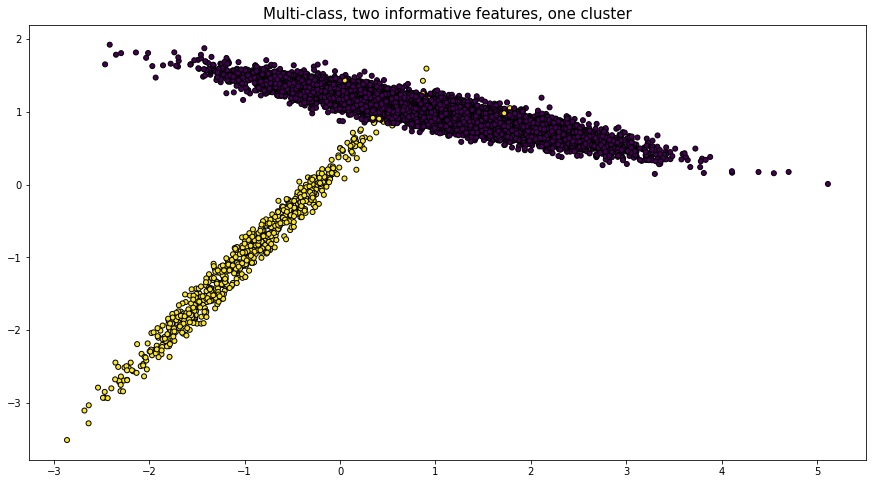

In [41]:
data_samples = 10000
num_classification_categories = 2

X1, Y1 = skl_data.make_classification(n_samples = data_samples, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=num_classification_categories, 
                                      weights = [0.93, 0.07])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.30, random_state=42)

plt.figure(figsize=(15, 8))
plt.title("Binary Data, two informative features, one cluster", fontsize='15')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

Before starting analizing the data, lets build a model to predict these labels and check its performance metrics

In [42]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
print('Is it %.2f%% a good validation accuracy?' %(dummy.score(X_test, y_test)*100))
y_pred = back_number(dummy.predict_proba(X_test))

Is it 93.07% a good validation accuracy?


### ROC and Precision-Recall

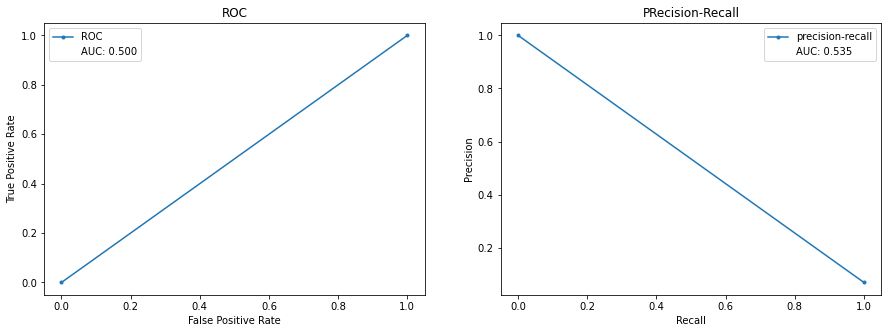

In [87]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_pred)
roc_auc = sklearn.metrics.roc_auc_score(y_test, y_pred)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(fpr, tpr, marker='.', label='ROC')
plt.plot([], [], " ", label='AUC: %.3f' % roc_auc)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1,2,2)

precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred)
auc_score = sklearn.metrics.auc(recall, precision)

plt.plot(recall, precision, marker='.', label='precision-recall')
plt.plot([], [], " ", label='AUC: %.3f' % auc_score)
plt.title('PRecision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [75]:
def model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=[2]),
        tf.keras.layers.Dense(num_classification_categories, activation=None)
        
    ])
    _opt = tf.keras.optimizers.Adam(learning_rate=0.001) 
    _loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=_opt,
                 loss=_loss,
                 metrics=['accuracy'])
    return model

modelo = model()

In [76]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
history_2 = modelo.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.6964 - accuracy: 0.4726 - val_loss: 0.4303 - val_accuracy: 0.9660
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.9774 - val_loss: 0.1476 - val_accuracy: 0.9783
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9807 - val_loss: 0.0727 - val_accuracy: 0.9833
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9860 - val_loss: 0.0605 - val_accuracy: 0.9860
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9874 - val_loss: 0.0554 - val_accuracy: 0.9883
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9893 - val_loss: 0.0524 - val_accuracy: 0.9893
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9914 - val_loss: 0.0505 - val_accuracy: 0.9903
Epoch 

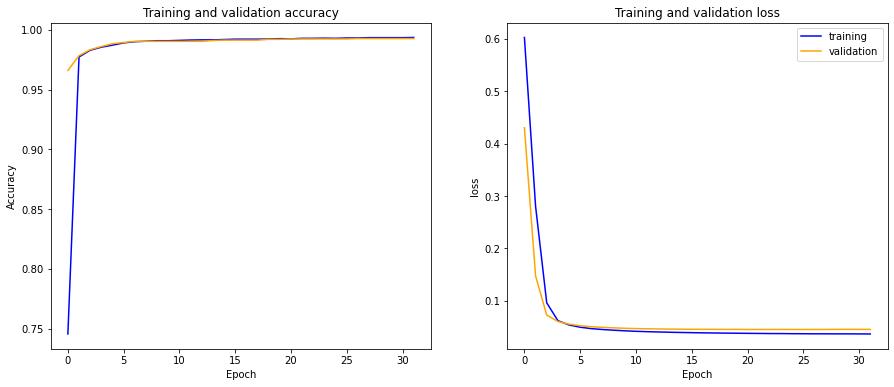

In [78]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
epochs_2 = range(len(acc_2))

plt.figure(figsize=(15,6))
# Plot accuracy vs epochs
plt.subplot(1,2,1)
plt.title('Training and validation accuracy')
plt.plot(epochs_2, acc_2, color='blue', label='training')
plt.plot(epochs_2, val_acc_2, color='orange', label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot loss vs epochs
plt.subplot(1,2,2)
plt.title('Training and validation loss')
plt.plot(epochs_2, loss_2, color='blue', label='training')
plt.plot(epochs_2, val_loss_2, color='orange', label='validation')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

In [79]:
pred = back_number(modelo.predict(X_test))


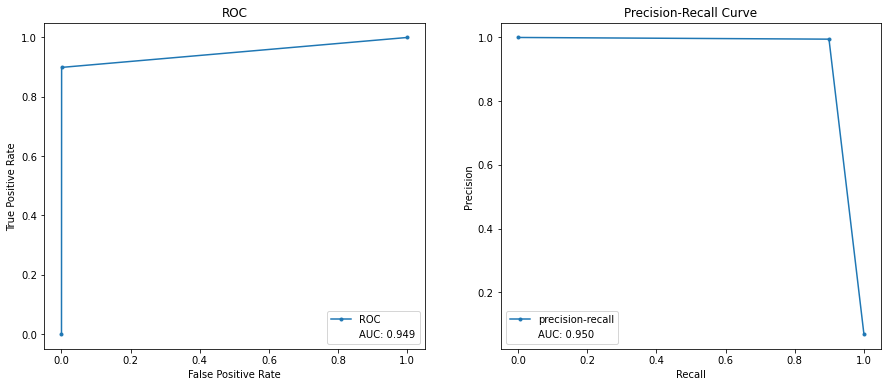

In [85]:
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, pred)
roc_auc = sklearn.metrics.roc_auc_score(y_test, pred)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(fpr, tpr, marker='.', label='ROC')
plt.plot([], [], " ", label='AUC: %.3f' % roc_auc)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, pred)
auc_score = sklearn.metrics.auc(recall, precision)

plt.subplot(1,2,2)
plt.plot(recall, precision, marker='.', label='precision-recall')
plt.plot([], [], " ", label='AUC: %.3f' % auc_score)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

Confusion Matrix

In [89]:
disp = sklearn.metrics.plot_confusion_matrix(modelo, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
sklearn.metrics.multilabel_confusion_matrix(y_tes,predictions)